<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_AND_AJUBA_PREDICT_TTYH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy==1.15


In [0]:

## Uncomment these lines if running as a google colab notebook: 
! git clone https://github.com/kundajelab/adar_editing
import os
os.chdir("adar_editing/xgboost_with_shap/")
!pip install shap
!pip install --upgrade xgboost
!pip install cufflinks


In [116]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [118]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap


In [119]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 216)


In [120]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(428, 219)


In [121]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 186)


In [122]:
train_split,eval_split=split_train_eval_by_mut_pos(ttyh2_comp[~ttyh2_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


## Train TTYH2, predict NEIL1

In [123]:
test_split=neil1_comp

In [124]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [125]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [126]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [127]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u1_exist
d3_length_internal_es
u2_5prm_cp_internal
d3_3prm_cp_internal:C:G
u2_struct:E
u2_3prm_cp_bulge:U:G
mut_prev_struct:H
d1_length_hairpin
d3_3prm_cp_internal:U:A
site_prev_struct:B
u1_3prm_cp_bulge:A:U
d3_length_bulge
u2_3prm_cp_internal
site_3prm_cp_bulge:G:U
u2_3prm_cp_bulge:G:C
mut_ref_struct:S
d1_5prm_cp_internal:A:U
d2_5prm_cp_internal:U:G
d3_5prm_cp_hairpin
mut_exist
mut_next_struct:E
u1_3prm_cp_internal
mut_ref_nt:A
mut_same_as_site
d3_3prm_cp_bulge:G:C
u2_length_internal_ecs
mut_ref_struct:B
d2_length_hairpin
d3_5prm_cp_bulge:G:C
d3_struct:B
d1_length_internal_ecs
u3_length_bulge
u1_5prm_cp_internal
u3_3prm_cp_bulge:C:G
u3_5prm_cp_bulge:C:G
d1_exist
u1_length_internal_es
u3_length_internal_es
u3_struct:B
site_5prm_cp_hairpin
mut_type:wt
u3_5prm_cp_bulge:A:U
site_5prm_cp_internal:U:G
site_prev_struct:H
site_next_struct:I
u1_length_hairpin
mut_ref_struct:I
d1_3prm_cp_internal:C:G
site_length_hairpin
u3_3prm_cp_internal
mut_type:indel
u1_5prm_cp_bulge:G:C
d3_length_hairpin
u

In [128]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [129]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [130]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 121)
(494,)
(83, 121)
(83,)
(428, 218)
(428,)


In [131]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [132]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['d2_length_internal_es', 'd2_length', 'mut_nt:A', 'mut_nt:C', 'u_all_stem_length', 'mut_struct:I', 'u3_length', 'u3_length_stem', 'd2_struct:B', 'site_5prm_cp_bulge:C:G', 'd3_struct:S', 'site_next_nt:U', 'u1_length_stem', 'site_5prm_cp_internal:C:G', 'site_struct:I', 'd2_5prm_cp_internal:G:C', 'd1_struct:S', 'site_1_1:A:G', 'mut_struct:S', 'd2_distance', 'd_all_stem_length', 'site_prev_nt:C', 'd1_distance', 'd2_length_stem', 'free_energy', 'mut_site_dist', 'u_count', 'd2_5prm_cp_internal:C:G', 'site_3prm_cp_internal:C:G', 'd3_length_stem', 'd3_distance', 'd2_3prm_cp_bulge:C:G', 'site_3prm_cp_internal:G:C', 'site_struct:B', 'd1_length', 'mut_nt:U', 'site_length_stem', 'mut_prev_struct:B', 'all_stem_length', 'mut_ref_nt:C', 'site_3prm_cp_bulge:G:C', 'd2_length_internal_ecs', 'd_count', 'site_prev_struct:S', 'd2_3prm_cp_bulge:U:A', 'd2_5prm_cp_bulge:G:C', 'd2_5prm_cp_internal:A:U', 'mut_next_struct:H', 'u2_length_bulge', 'site_3prm_cp_internal:G:U', 'mut_next_struct:S', 'u2_struct:B', 'u

In [133]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [134]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [135]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [136]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[09:53:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-aucpr:0.273126	eval-auc:0.734026	eval-mae:0.285364	eval-map:1	eval-rmse:0.304156	train-aucpr:0.310435	train-auc:0.720448	train-mae:0.243029	train-map:1	train-rmse:0.261071
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[09:53:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-aucpr:0.299995	eval-auc:0.768324	eval-mae:0.210572	eval-map:1	eval-rmse:0.227912	train-aucpr:0.325273	train-auc:0.731621	train-mae:0.172954	train-map:1	train-rmse:0.189346
[09:53:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-aucpr:0.30538	eval-auc:0.785697	eval-mae:0.159105	eval-map:1	eval-rmse:0.174565	train-aucpr:0.329601	train-auc:0.74

[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-aucpr:0.321954	eval-auc:0.821888	eval-mae:0.031084	eval-map:1	eval-rmse:0.047069	train-aucpr:0.350975	train-auc:0.766452	train-mae:0.007291	train-map:1	train-rmse:0.010556
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-aucpr:0.320955	eval-auc:0.821623	eval-mae:0.030768	eval-map:1	eval-rmse:0.04663	train-aucpr:0.35104	train-auc:0.766549	train-mae:0.006888	train-map:1	train-rmse:0.009947
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-aucpr:0.321064	eval-auc:0.821676	eval-mae:0.030653	eval-map:1	eval-rmse:0.046868	train-aucpr:0.351156	train-auc:0.766656	train-mae:0.006433	train-map:1	train-rmse:0.009141
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra

[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-aucpr:0.322972	eval-auc:0.822529	eval-mae:0.028805	eval-map:1	eval-rmse:0.046017	train-aucpr:0.351699	train-auc:0.767148	train-mae:0.002374	train-map:1	train-rmse:0.00341
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-aucpr:0.323015	eval-auc:0.82257	eval-mae:0.028704	eval-map:1	eval-rmse:0.045924	train-aucpr:0.351712	train-auc:0.767157	train-mae:0.002247	train-map:1	train-rmse:0.00321
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[56]	eval-aucpr:0.32304	eval-auc:0.822647	eval-mae:0.028646	eval-map:1	eval-rmse:0.045882	train-aucpr:0.351719	train-auc:0.767161	train-mae:0.002191	train-map:1	train-rmse:0.003125
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra n

[81]	eval-aucpr:0.323295	eval-auc:0.822773	eval-mae:0.028178	eval-map:1	eval-rmse:0.045719	train-aucpr:0.351777	train-auc:0.767219	train-mae:0.001137	train-map:1	train-rmse:0.001659
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[82]	eval-aucpr:0.323295	eval-auc:0.822773	eval-mae:0.028137	eval-map:1	eval-rmse:0.045696	train-aucpr:0.351778	train-auc:0.76722	train-mae:0.001111	train-map:1	train-rmse:0.001607
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[83]	eval-aucpr:0.323298	eval-auc:0.822792	eval-mae:0.028129	eval-map:1	eval-rmse:0.045662	train-aucpr:0.351779	train-auc:0.767221	train-mae:0.001088	train-map:1	train-rmse:0.001584
[09:53:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[84]	eval-aucpr:0.323298	eval-auc:0.822792	eval-mae:0.028129	eval-map:1	eval-rmse:0.045

In [137]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [138]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998136817134163, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.895787307057057, pvalue=2.9453537319318225e-30)
Test:SpearmanrResult(correlation=0.23499404887589567, pvalue=8.815437552305395e-07)


Pearson correlation:
Train:(0.9999261275679872, 0.0)
Eval:(0.9530117106428243, 9.033547078683004e-44)
Test:(0.29763974922314185, 3.330481064812383e-10)


In [139]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010882215170884455
MAE Eval:0.028129393607512654
MAE Test:0.19896583845292296


In [140]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.2767256980543487%
MAPE Eval:69.82542475162894%
MAPE Test:278.69340446600705%


In [141]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0015836894735694034
RMSE Eval:0.04566182363748944
RMSE Test:0.22894309224157117


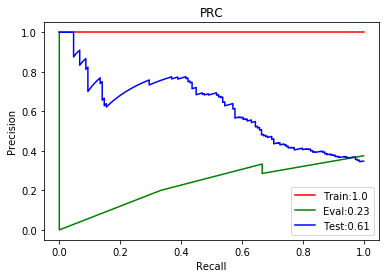

In [142]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

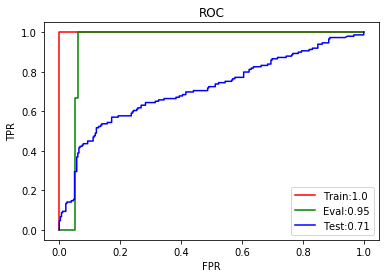

In [143]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

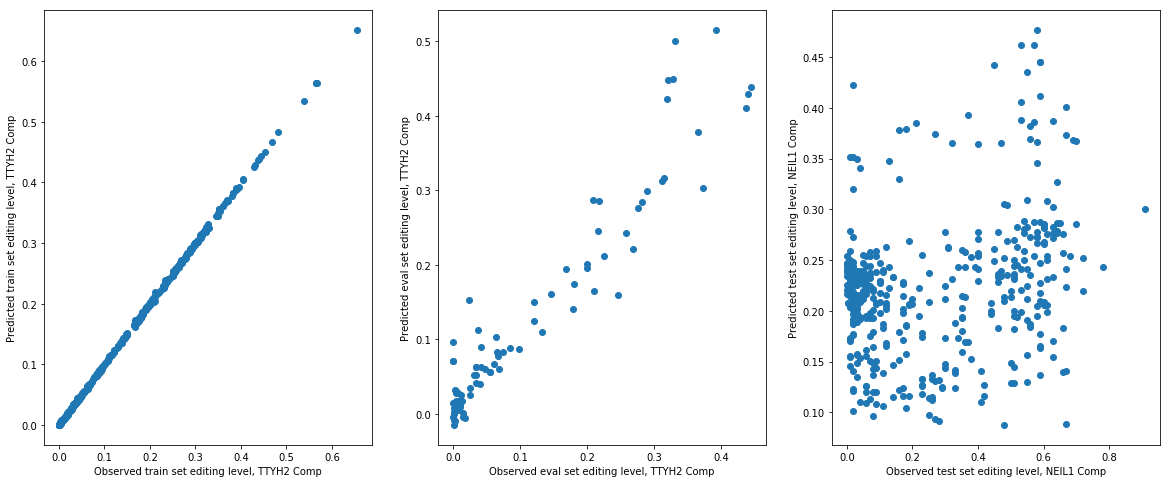

In [144]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, NEIL1 Comp")
plt.ylabel("Predicted test set editing level, NEIL1 Comp")

plt.show()

## Train TTYH2, predict AJUBA

In [145]:
test_split=ajuba_comp

In [146]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [147]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [148]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [149]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

site_length_hairpin
u1_5prm_cp_hairpin
u2_length_internal_es
u1_exist
d3_exist
d3_3prm_cp_bulge
u3_3prm_cp_internal
u2_5prm_cp_internal
d2_3prm_cp_bulge
u1_3prm_cp_internal
d3_length_hairpin
d1_5prm_cp_hairpin
d1_length_hairpin
d2_exist
u2_length_internal_ecs
u1_length_internal_ecs
d2_length_hairpin
u3_length_internal_ecs
d3_length_bulge
d2_5prm_cp_bulge
u2_3prm_cp_internal
u1_5prm_cp_internal
d2_length_bulge
d2_5prm_cp_hairpin
u2_exist
d1_exist
u1_length_internal_es
u3_length_internal_es
site_5prm_cp_hairpin
d3_5prm_cp_bulge
d3_5prm_cp_hairpin
u1_length_hairpin
u3_5prm_cp_internal


In [150]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [151]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [152]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 120)
(494,)
(83, 120)
(83,)
(482, 152)
(482,)


In [153]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [154]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['d2_length_internal_es', 'd2_length', 'mut_nt:A', 'site_prev_struct:I', 'mut_nt:C', 'site_5prm_cp_bulge:G:C', 'u_all_stem_length', 'mut_struct:I', 'u3_length', 'u3_length_stem', 'site_5prm_cp_bulge:C:G', 'd3_struct:S', 'site_next_nt:U', 'u1_length_stem', 'd1_struct:B', 'site_5prm_cp_internal:C:G', 'site_struct:I', 'd2_5prm_cp_internal:G:C', 'd1_struct:S', 'site_1_1:A:G', 'mut_struct:S', 'site_next_nt:G', 'd2_distance', 'd_all_stem_length', 'site_prev_nt:C', 'd1_distance', 'd2_length_stem', 'free_energy', 'u3_5prm_cp_hairpin:A:U', 'mut_site_dist', 'u_count', 'site_3prm_cp_internal:C:G', 'd3_length_stem', 'd3_distance', 'site_3prm_cp_internal:G:C', 'site_struct:B', 'd1_length', 'mut_nt:U', 'site_length_stem', 'mut_prev_struct:B', 'all_stem_length', 'mut_ref_nt:C', 'd1_3prm_cp_bulge:G:U', 'site_3prm_cp_bulge:G:C', 'd2_length_internal_ecs', 'd_count', 'site_prev_struct:S', 'site_prev_nt:G', 'd2_5prm_cp_internal:A:U', 'site_next_struct:B', 'u2_length_bulge', 'mut_next_struct:S', 'u2_struct

In [155]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [156]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [157]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [158]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[0]	eval-aucpr:0.24448	eval-auc:0.710391	eval-mae:0.281719	eval-map:1	eval-rmse:0.302947	train-aucpr:0.312921	train-auc:0.718807	train-mae:0.242982	train-map:1	train-rmse:0.2612
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-aucpr:0.285602	eval-auc:0.766594	eval-mae:0.209057	eval-map:1	eval-rmse:0.226998	train-aucpr:0.324698	train-auc:0.730429	train-mae:0.172902	train-map:1	train-rmse:0.189533
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[2]	eval-aucpr:0.293998	eval-auc:0.788543	eval-mae:0.160634	eval-map:1	eval-rmse:0.176284	train-aucpr:0.333523	train-auc:0.7428

[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[27]	eval-aucpr:0.32129	eval-auc:0.821191	eval-mae:0.026547	eval-map:1	eval-rmse:0.042924	train-aucpr:0.350474	train-auc:0.766052	train-mae:0.008645	train-map:1	train-rmse:0.012466
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[28]	eval-aucpr:0.32128	eval-auc:0.821138	eval-mae:0.026533	eval-map:1	eval-rmse:0.042966	train-aucpr:0.350594	train-auc:0.766084	train-mae:0.008402	train-map:1	train-rmse:0.012181
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[29]	eval-aucpr:0.320847	eval-auc:0.82123	eval-mae:0.026208	eval-map:1	eval-rmse:0.042716	train-aucpr:0.350866	train-auc:0.766264	train-mae:0.007806	train-map:1	train-rmse:0.011216
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra 

[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[54]	eval-aucpr:0.327856	eval-auc:0.82157	eval-mae:0.025469	eval-map:1	eval-rmse:0.041414	train-aucpr:0.35165	train-auc:0.767109	train-mae:0.002723	train-map:1	train-rmse:0.004049
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[55]	eval-aucpr:0.327864	eval-auc:0.821599	eval-mae:0.025394	eval-map:1	eval-rmse:0.041311	train-aucpr:0.351671	train-auc:0.767127	train-mae:0.002569	train-map:1	train-rmse:0.003783
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[56]	eval-aucpr:0.327794	eval-auc:0.821469	eval-mae:0.025397	eval-map:1	eval-rmse:0.041317	train-aucpr:0.351668	train-auc:0.767129	train-mae:0.002523	train-map:1	train-rmse:0.003742
[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra

[10:00:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[81]	eval-aucpr:0.327748	eval-auc:0.821296	eval-mae:0.025279	eval-map:1	eval-rmse:0.041383	train-aucpr:0.351792	train-auc:0.767223	train-mae:0.000976	train-map:1	train-rmse:0.001428
[10:01:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[82]	eval-aucpr:0.327746	eval-auc:0.821288	eval-mae:0.025274	eval-map:1	eval-rmse:0.041379	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.000924	train-map:1	train-rmse:0.001347
[10:01:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[83]	eval-aucpr:0.327746	eval-auc:0.821288	eval-mae:0.025273	eval-map:1	eval-rmse:0.041378	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.00092	train-map:1	train-rmse:0.001343
[10:01:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra 

In [159]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [160]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998210727176042, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9307036746205135, pvalue=3.953550110398869e-37)
Test:SpearmanrResult(correlation=0.43383111820942905, pvalue=1.5364856238759727e-23)


Pearson correlation:
Train:(0.9999467928166015, 0.0)
Eval:(0.950721448322106, 5.933398073327018e-43)
Test:(0.4573878970390998, 2.7100613074749894e-26)


In [161]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0009204485125899748
MAE Eval:0.02527285288429695
MAE Test:0.20983338934389922


In [162]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.1849723208553926%
MAPE Eval:47.257086629796895%
MAPE Test:820.3989125053425%


In [163]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0013429138543972164
RMSE Eval:0.04137824290892959
RMSE Test:0.21695596130120892


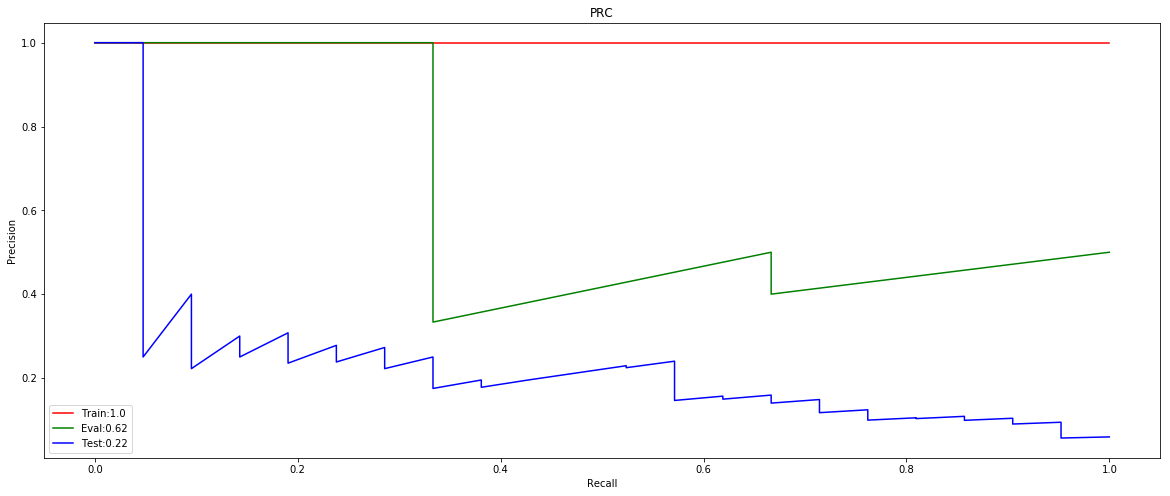

In [164]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

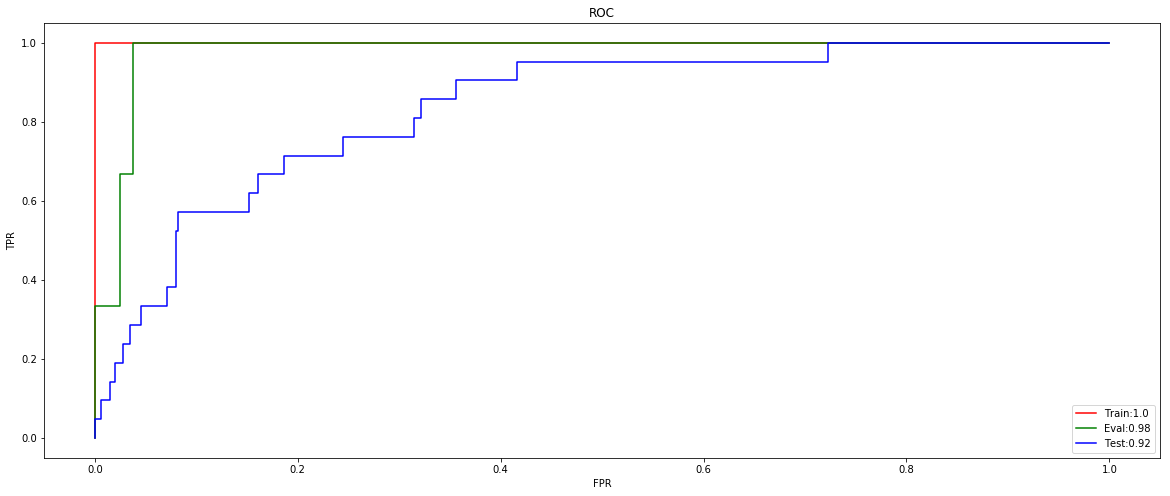

In [166]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

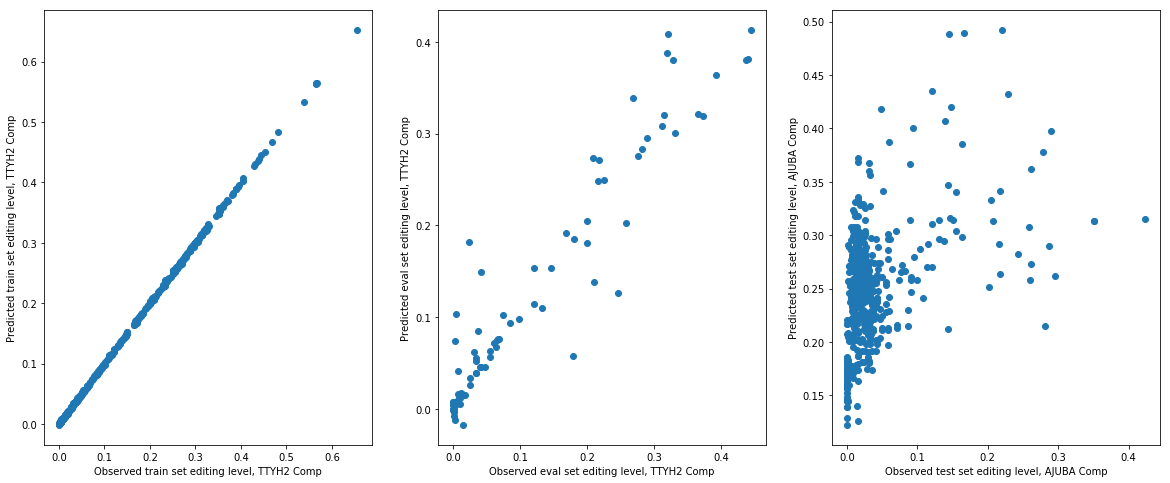

In [167]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()